In [12]:
# importing required libraries

import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
df = pd.read_csv("/content/Codebasics_YT_Stats.csv")

In [14]:
df.head()

,video_id,Title,Published_at,Views,Likes,Comments,Description,Tags,duration,subscribers
0,wHc2_0wCVmc,Maths and Stats Course | Teaser | The beginnin...,2023-12-26T13:30:10Z,4822,236,27,Much awaited Maths & Statistics Course will be...,"['yt:cc=on', 'maths and statistics', 'maths an...",PT1M8S,909000
1,eKNZQEyf7qw,👆 12 Best Practices For Data Analytics Project!,2023-12-26T12:30:31Z,2373,230,6,We will discuss 12 best practices to make any ...,[],PT35S,909000
2,ExsovxBVP98,Wishing you all a Merry Christmas! 🎁🎉🎅🏻,2023-12-25T12:30:08Z,1683,56,5,It's Secret Santa time at 𝐂𝐨𝐝𝐞𝐛𝐚𝐬𝐢𝐜𝐬 ❤️\n\nWhi...,[],PT1M,909000
3,2iI6VMalfSc,Do you need VBA ?,2023-12-24T12:30:01Z,3975,254,8,Do you need to learn VBA? 🤔📄🔍 \n\nThe quick an...,[],PT39S,909000
4,XHyTg-zY4TI,What is MVP in a Data Analytics Project?,2023-12-23T12:30:19Z,3574,209,1,If you liked the video then share it with your...,[],PT32S,909000


In [15]:
df.shape

(765, 10)

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

video_id        0
Title           0
Published_at    0
Views           0
Likes           0
Comments        0
Description     1
Tags            0
duration        0
subscribers     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      765 non-null    object
 1   Title         765 non-null    object
 2   Published_at  765 non-null    object
 3   Views         765 non-null    int64 
 4   Likes         765 non-null    int64 
 5   Comments      765 non-null    int64 
 6   Description   764 non-null    object
 7   Tags          765 non-null    object
 8   duration      765 non-null    object
 9   subscribers   765 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 59.9+ KB


In [20]:
# Extracting Required columns

df = df[["video_id","Title","Tags","Published_at","Views","Likes","Comments","duration","subscribers"]]

In [21]:
df

,video_id,Title,Tags,Published_at,Views,Likes,Comments,duration,subscribers
0,wHc2_0wCVmc,Maths and Stats Course | Teaser | The beginnin...,"['yt:cc=on', 'maths and statistics', 'maths an...",2023-12-26T13:30:10Z,4822,236,27,PT1M8S,909000
1,eKNZQEyf7qw,👆 12 Best Practices For Data Analytics Project!,[],2023-12-26T12:30:31Z,2373,230,6,PT35S,909000
2,ExsovxBVP98,Wishing you all a Merry Christmas! 🎁🎉🎅🏻,[],2023-12-25T12:30:08Z,1683,56,5,PT1M,909000
3,2iI6VMalfSc,Do you need VBA ?,[],2023-12-24T12:30:01Z,3975,254,8,PT39S,909000
4,XHyTg-zY4TI,What is MVP in a Data Analytics Project?,[],2023-12-23T12:30:19Z,3574,209,1,PT32S,909000
...,...,...,...,...,...,...,...,...,...
760,pP91kLR5cnE,Python Tutorial - 5. Lists,"['python', 'python tutorial', 'python for begi...",2015-12-20T23:01:51Z,34735,317,55,PT12M4S,909000
761,PsoKq0p5meU,Python Tutorial - 4. Strings,"['python', 'python tutorial', 'python for begi...",2015-12-20T22:34:19Z,28593,317,28,PT9M27S,909000
762,YJKEqaaSGDs,Python Tutorial - 3. Numbers,"['python', 'python tutorial', 'python for begi...",2015-12-20T02:54:56Z,32416,321,31,PT10M,909000
763,BAoV5_qVKco,Python Tutorial - 2. Variables,"['python', 'python tutorial', 'python for begi...",2015-12-20T02:11:10Z,42556,333,24,PT4M45S,909000


## **Explorartory Data Analysis**

In [ ]:
# converting datatypes from object to datetiem for PublishedAT column

df["Published_at"] = pd.to_datetime(df["Published_at"])

In [ ]:
!pip install isodate

In [ ]:
from isodate import parse_duration

df['duration'] = df['duration'].apply(lambda x: parse_duration(x))

df['duration'] = df['duration'].astype("timedelta64[s]")

In [ ]:
# renaming duration to duration_seconds

df.rename(columns = { "duration" : "duration_seconds"} , inplace = True)

In [28]:
df[["Title" , "duration_seconds"]].head(2)

,Title,duration_seconds
0,Maths and Stats Course | Teaser | The beginnin...,68.0
1,👆 12 Best Practices For Data Analytics Project!,35.0


In [29]:
# Tags used in each videos

df["tag_count"] = df["Tags"].apply(lambda x: len(x.split(', ')))

In [30]:
df[["Tags","tag_count"]].head(2)

,Tags,tag_count
0,"['yt:cc=on', 'maths and statistics', 'maths an...",11
1,[],1


In [31]:
# extracting date,year,time and month from publishedAt column

df["upload_date"] = df["Published_at"].dt.date #date

df["upload_year"] = df["Published_at"].dt.year  #year

df["upload_month"] = df["Published_at"].dt.month_name()  #month

df["upload_day"] = df["Published_at"].dt.day_name()  #weekday

df["upload_time"] = df["Published_at"].dt.time   #time

In [33]:
df[["upload_year","upload_month","upload_day","upload_date","upload_time"]].sample(4)

,upload_year,upload_month,upload_day,upload_date,upload_time
488,2020,November,Saturday,2020-11-07,14:57:28
179,2023,February,Wednesday,2023-02-08,08:48:46
598,2020,March,Friday,2020-03-06,04:06:33
84,2023,October,Thursday,2023-10-12,12:30:26


In [37]:
df.sample(5)

,video_id,Title,Tags,Published_at,Views,Likes,Comments,duration_seconds,subscribers,tag_count,upload_date,upload_year,upload_month,upload_day,upload_time
615,JL_grPUnXzY,What is Data Science? | Free Data Science Cour...,"['codebasics', 'data science for beginners', '...",2019-12-10 03:47:20+00:00,479193,6506,350,407.0,909000,19,2019-12-10,2019,December,Tuesday,03:47:20
285,tB2dp6OKoz8,NVIDIA GTC & A Giveaway!,"['yt:cc=on', 'nvidia gtc 2022', 'nvidia', 'gtc...",2022-03-19 02:30:13+00:00,5862,215,45,378.0,909000,23,2022-03-19,2022,March,Saturday,02:30:13
250,HuZiJ44_71M,How to Design an Effective Data Visualization ...,"['yt:cc=on', 'dashboard design data visualizat...",2022-07-09 15:00:11+00:00,57672,702,17,607.0,909000,18,2022-07-09,2022,July,Saturday,15:00:11
612,gMoJIH0prL4,Machine Learning & Data Science Project - 3 : ...,"['machine learning projects in python', 'featu...",2020-01-01 02:35:54+00:00,134496,1356,96,506.0,909000,14,2020-01-01,2020,January,Wednesday,02:35:54
6,n7R3HGnmg1I,Paid Courses or Free Courses?,[],2023-12-22 12:30:33+00:00,2761,209,5,30.0,909000,1,2023-12-22,2023,December,Friday,12:30:33


In [42]:
sns.set(style='dark')

# **Q) Top 5 Most viewed Videos**

In [38]:
#top 5 videos as per view count

top_5 = df[["Title","Views","upload_year","duration_seconds"]].sort_values("Views" , ascending = False).head(5)

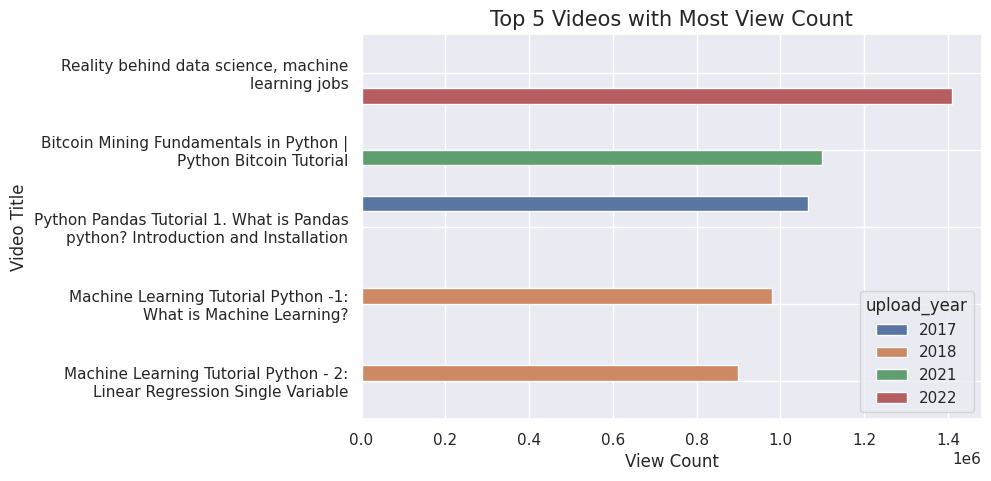

In [43]:
plt.figure(figsize = (8,5))

import textwrap
wrapped_titles = [textwrap.fill(title, width=40) for title in top_5["Title"]]

sns.barplot(data = top_5 , y = wrapped_titles , x = "Views" , hue = "upload_year")

plt.title("Top 5 Videos with Most View Count", fontsize = 15)
plt.xlabel("View Count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) Top 5 most liked videos**

In [40]:
like_5 = df[["Title", "Likes", "upload_year", "duration_seconds"]].sort_values("Likes" , ascending = False).head(5)

like_5

,Title,Likes,upload_year,duration_seconds
293,"Reality behind data science, machine learning ...",64537,2022,53.0
441,Bitcoin Mining Fundamentals in Python | Python...,31775,2021,1500.0
512,Complete python roadmap | How to become an exp...,30293,2020,802.0
605,Skills required for data analyst | How to lear...,24322,2020,673.0
186,Data Science Roadmap 2023 | Learn Data Science...,23749,2023,2909.0


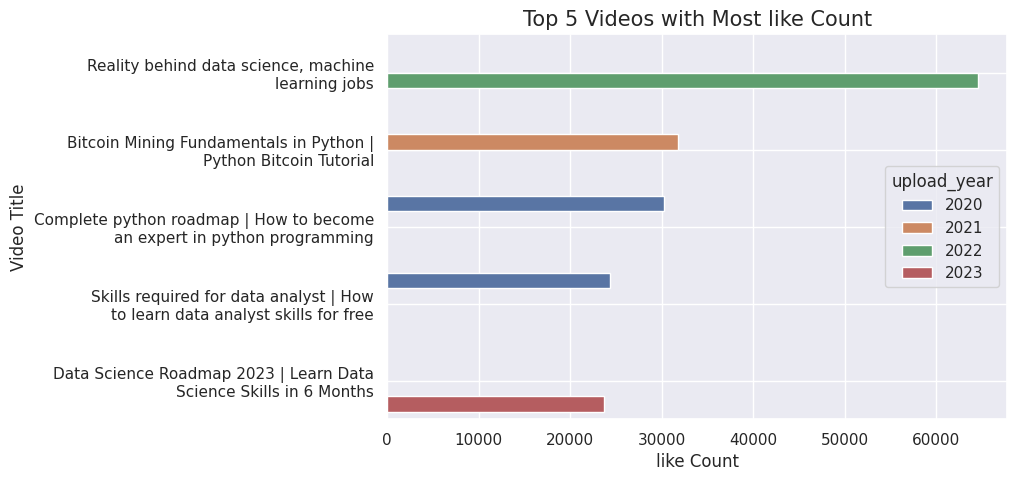

In [44]:
plt.figure(figsize = (8,5))

import textwrap
wrapped_titles = [textwrap.fill(title, width=40) for title in like_5["Title"]]

sns.barplot(data = like_5 , y = wrapped_titles , x = "Likes" , hue = "upload_year")

plt.title("Top 5 Videos with Most like Count", fontsize = 15)
plt.xlabel("like Count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) How Does Total View Count Vary Over Years?**

In [45]:
yearly_view = df.groupby("upload_year")["Views"].sum().reset_index()

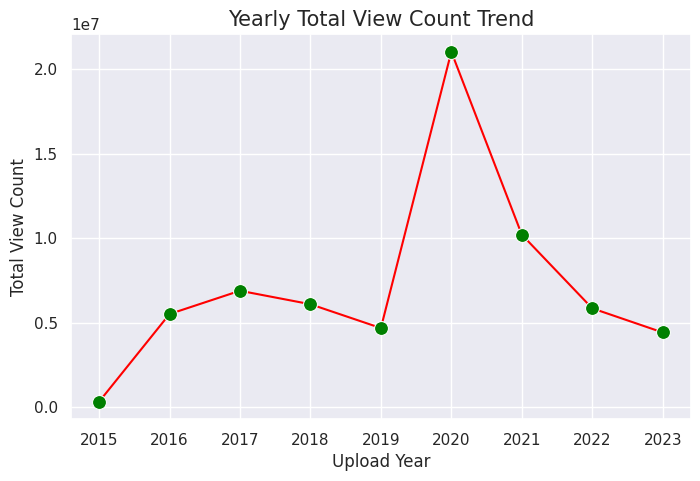

In [46]:
#plotting the line graph

plt.figure(figsize = (8,5))

sns.lineplot(data = yearly_view , x = "upload_year" , y = "Views" ,marker = "o" , color = "red" , markerfacecolor = "green" , markersize = 10)

plt.title("Yearly Total View Count Trend",fontsize = 15)
plt.xlabel("Upload Year")
plt.ylabel("Total View Count")

plt.grid()
plt.show()

# **Q) Number of videos uploaded on the YouTube channel changed over the years?**

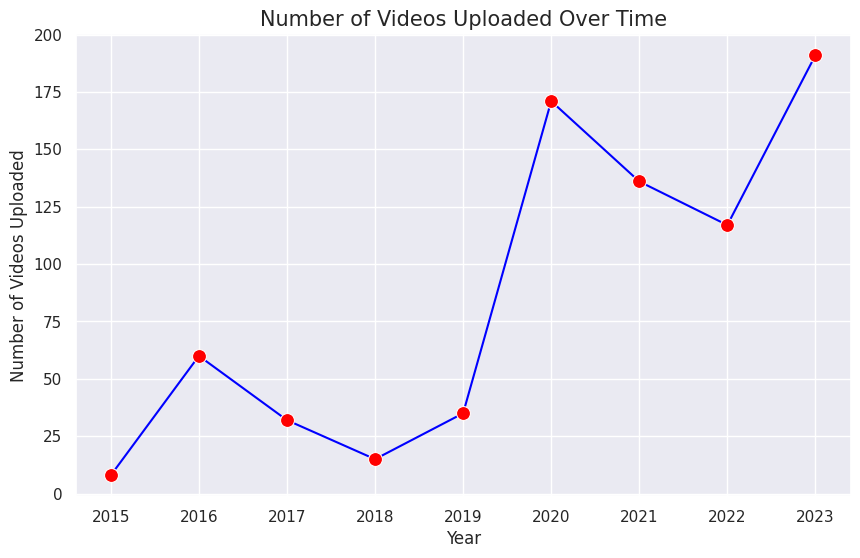

In [47]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby(df["upload_year"])["upload_month"].count(), marker="o", color="blue", markerfacecolor = "red" , markersize = 10)

plt.title("Number of Videos Uploaded Over Time", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Number of Videos Uploaded")

plt.grid()
plt.show()


# **Q) When are the Majority of Videos Uploaded?**

In [53]:

def upload_timings(upload_time):
    if 5 <= upload_time.hour < 12:
        return 'Morning'
    elif 12 <= upload_time.hour < 17:
        return 'Afternoon'
    elif 17 <= upload_time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_slot'] = df['upload_time'].apply(upload_timings)

In [54]:
time_slot_counts = df['time_slot'].value_counts()
time_slot_counts

Afternoon    583
Night        127
Evening       42
Morning       13
Name: time_slot, dtype: int64

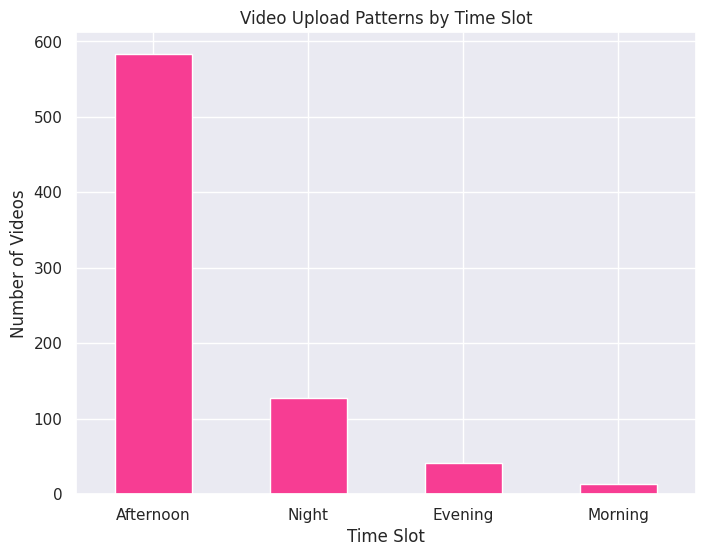

In [55]:
plt.figure(figsize=(8, 6))

time_slot_counts.plot(kind='bar', color='#F73D93')

plt.xlabel('Time Slot')
plt.ylabel('Number of Videos')
plt.title('Video Upload Patterns by Time Slot')
plt.xticks(rotation=0)

plt.grid()
plt.show()

# **Q) How many videos were uploaded on each day of the week?**

In [56]:
day_counts = df['upload_day'].value_counts()

day_counts

Saturday     181
Wednesday    123
Sunday       114
Thursday      90
Tuesday       87
Friday        87
Monday        83
Name: upload_day, dtype: int64

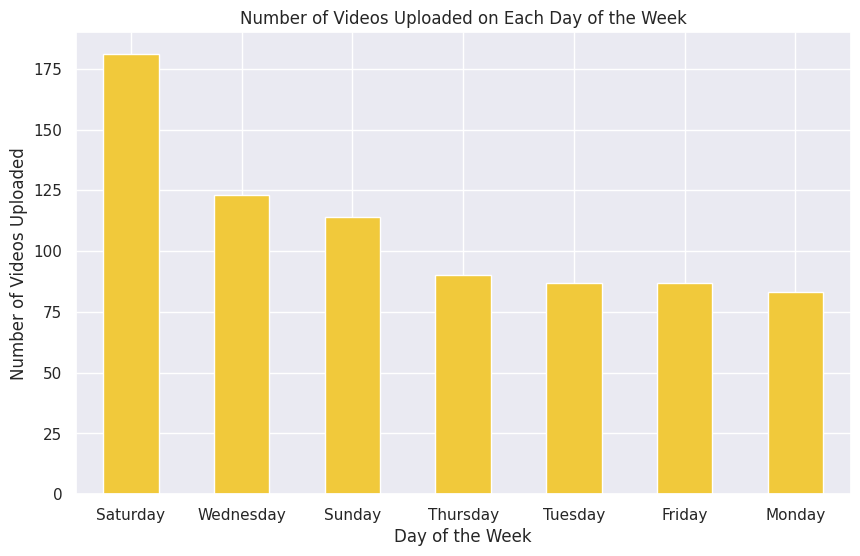

In [57]:
plt.figure(figsize=(10, 6))

day_counts.plot(kind='bar', color='#F1C93B')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Uploaded')
plt.title('Number of Videos Uploaded on Each Day of the Week')
plt.xticks(rotation=0)

plt.grid()
# Show the plot
plt.show()

# **Q) Relationship between the number of tags and average view count?**

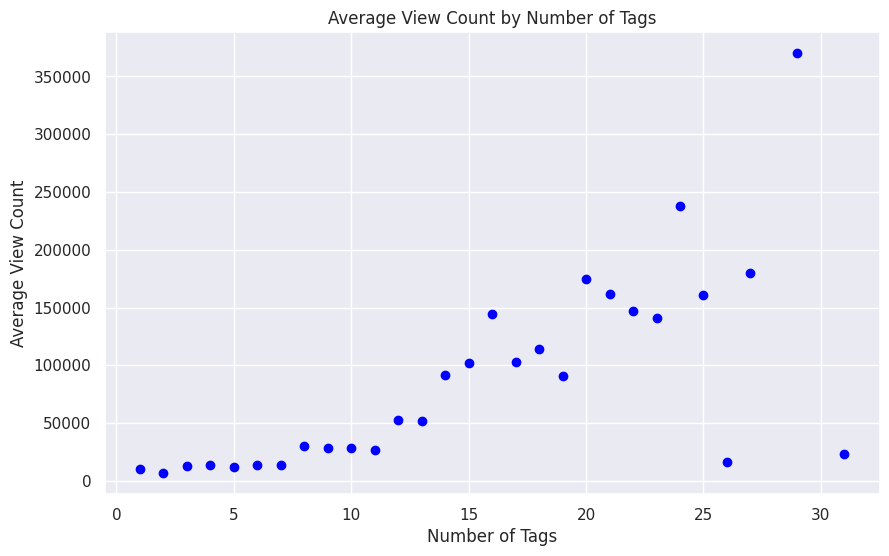

In [58]:
avg_view_by_tags = df.groupby('tag_count')['Views'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(avg_view_by_tags['tag_count'], avg_view_by_tags['Views'], color='blue')

plt.title('Average View Count by Number of Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Average View Count')


plt.grid()
plt.show()

# **Q) What is the Most Frequent Word Used in Titles?**

In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

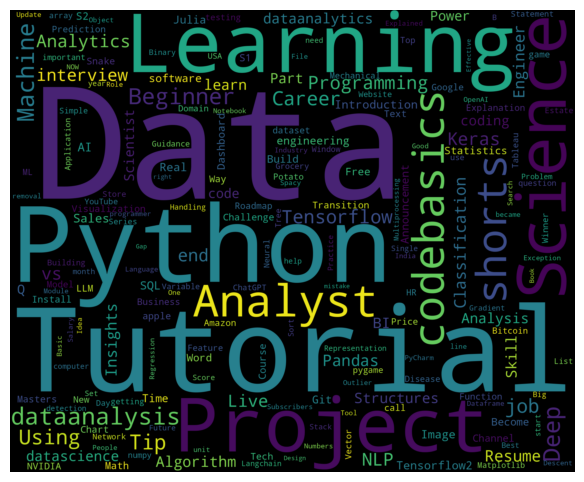

In [60]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Removing stopwords from titles
stop_words = set(stopwords.words("english"))
df["title_no_stopwords"] = df["Title"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Combining all titles into a single string
all_words_str = ' '.join(df["title_no_stopwords"].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=2200, height=1800, random_state=1, collocations=False).generate(all_words_str)

# Define a function to plot the word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_cloud(wordcloud)

In [62]:
# exporting csv file

df.to_csv("Codebasics_BI.csv", index = False)

# **SHORT VIDEOS**

# **Q) How many Short Videos are uploaded?**

In [63]:
from datetime import date

In [64]:
short_videos = df[ (df["upload_date"] > date(2020,9,1)) & (df['duration_seconds'] <= 60.0) ]

short_videos.shape

(173, 17)

In [70]:
# extracting required columns

short_videos = short_videos[["Title","Views","Likes","duration_seconds","upload_year","upload_month","upload_time"]]

short_videos.sample(5)

,Title,Views,Likes,duration_seconds,upload_year,upload_month,upload_time
71,✨A BIG ANNOUNCEMENT✨,6957,272,50.0,2023,October,12:30:24
149,You are missing out on a good friend #shorts #...,8321,638,35.0,2023,August,15:30:01
118,Data Science Roadmap! 🛣✅ #codebasics #shorts #...,7741,730,45.0,2023,September,12:30:11
23,New Resume Project Challenge is LIVE NOW!,4341,128,21.0,2023,December,12:30:34
12,Hack Struggle in learning,4149,370,39.0,2023,December,12:30:00


# **Q) Most Viewed short videos ?**

In [72]:
top5 = short_videos[["Title","Views","upload_year"]].sort_values("Views" , ascending = False).head(5)

top5

,Title,Views,upload_year
293,"Reality behind data science, machine learning ...",1409785,2022
273,Future of data science jobs,146592,2022
235,Your First Data Analytics Project,123772,2022
265,A Killer Update In Power BI 🔥,112206,2022
130,Programmer or Zookeeper? 🤔🐍🐼 #dataanalysis #da...,74151,2023


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128060 (\N{PANDA FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


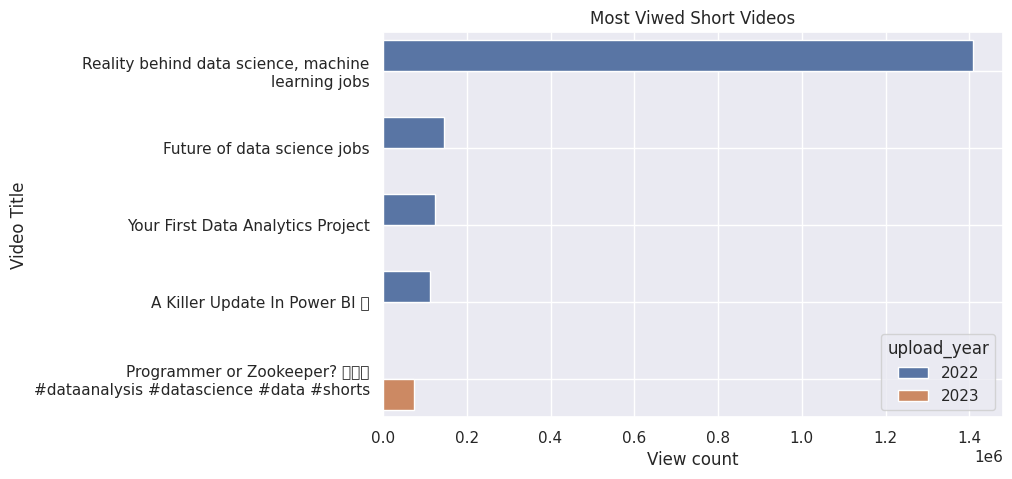

In [73]:
plt.figure(figsize =(8,5))

wrapped_titles = [textwrap.fill(title, width=40) for title in top5["Title"]]

sns.barplot(data = top5 , x = "Views", y = wrapped_titles , hue = "upload_year")

plt.title("Most Viwed Short Videos")
plt.xlabel("View count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) Most liked Short videos?**

In [75]:
like5 = short_videos[["Title","Likes","upload_year"]].sort_values("Likes" , ascending = False).head(5)

like5

,Title,Likes,upload_year
293,"Reality behind data science, machine learning ...",64537,2022
235,Your First Data Analytics Project,8275,2022
273,Future of data science jobs,7630,2022
265,A Killer Update In Power BI 🔥,4451,2022
115,This Attitude YOU NEED in Data Field! 📈✅ #code...,3182,2023


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


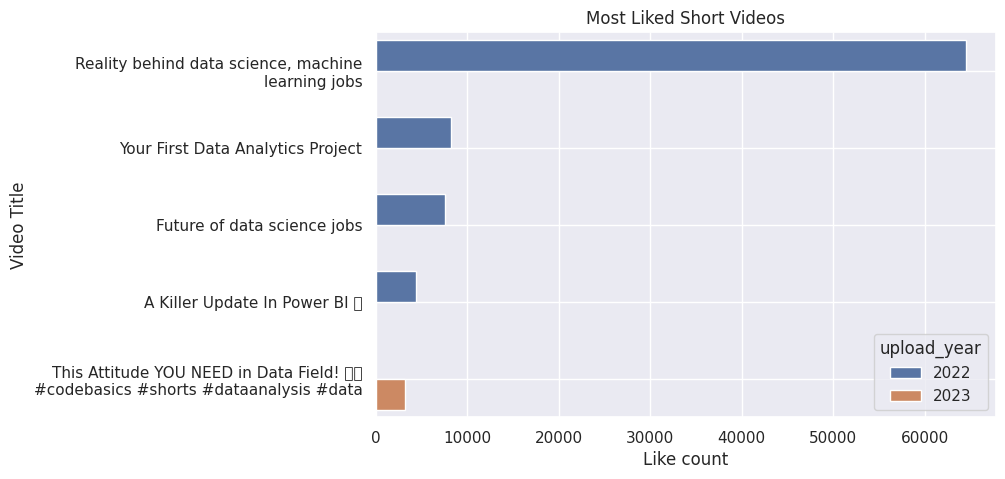

In [76]:
plt.figure(figsize =(8,5))

wrapped_titles = [textwrap.fill(title, width=40) for title in like5["Title"]]

sns.barplot(data = like5 , x = "Likes", y = wrapped_titles , hue = "upload_year")

plt.title("Most Liked Short Videos")
plt.xlabel("Like count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) Video Durations for Short Videos?**

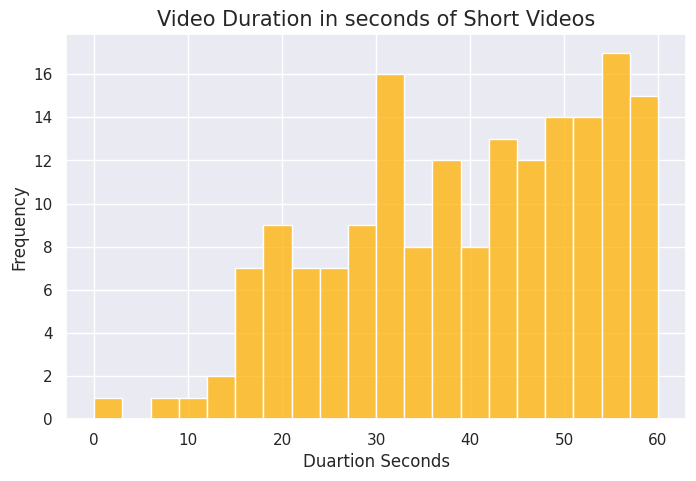

In [71]:
# using histogram with kde plot

plt.figure(figsize=(8, 5))

sns.histplot(data=short_videos, x='duration_seconds', bins=20 , color = "#FFB100")

plt.title("Video Duration in seconds of Short Videos", fontsize = 15)
plt.xlabel("Duartion Seconds")
plt.ylabel("Frequency")

plt.grid()
plt.show()

# **Q) Number of Shorts uploaded on yearly basis ?**

In [78]:
temp_df = short_videos.groupby("upload_year")["Title"].count()

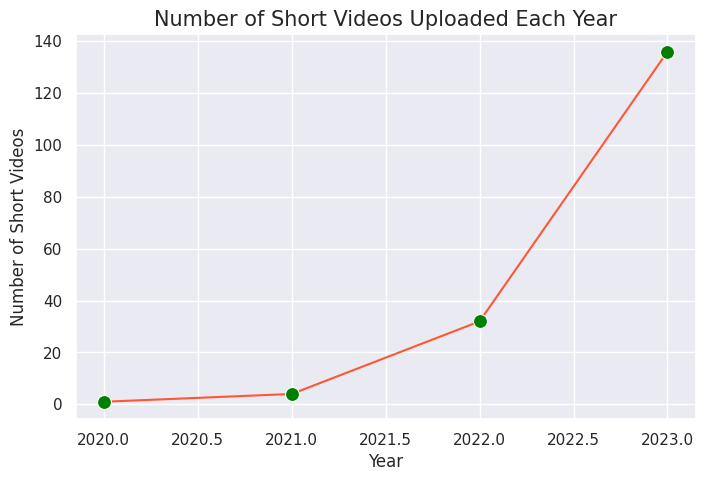

In [79]:
plt.figure(figsize=(8, 5))

sns.lineplot(x=temp_df.index, y=temp_df.values, color="#FF5733" , marker = "o" , markerfacecolor = "green" ,markersize = 10 )

plt.title("Number of Short Videos Uploaded Each Year", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Number of Short Videos")

plt.grid()
plt.show()

**Conclusion:**


**This project aims to provide a comprehensive analysis of the Codebasics YouTube channel dataset, helping to uncover valuable insights that can guide content creation and optimization strategies. By understanding audience preferences, engagement patterns, and trends, the Codebasics team can make informed decisions to enhance their channel's performance and reach.**